<a href="https://colab.research.google.com/github/seoyujiin/esaa_ob/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9Cch3_1~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 p.50~86

##**PART 03 케라스(Keras)**

###**01 딥러닝 준비**

* 케라스 API: 고수준의 딥러닝 라이브러리
  * 다른 딥러닝 라이브러리와 가장 큰 차이는 GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용한다는 점
  * 본래 목적 자체가 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것
  * 장점 - 직관적이고 사용자 친화적으로 설계되어 있어 코딩의 난이도가 어렵지 않고 백엔드 엔진을 쉽게 변경할 수 있음
  * 한계점 - 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야 함


####**1-1 주요 용어**

**1-1-1 하이퍼파라미터(hyper-parameter)**

* 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
* 모델이 훈련하면서 가중치(weights)와 편향(bias)은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만, 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많음
* 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지므로 매우 중요(사용자가 별도로 설정해주지 않으면 기본값이 지정되어 있어서 자동으로 적용됨)
* 하이퍼파라미터 튜닝(tuning): 하이퍼파라미터의 값을 조절하는 행위
* 딥러닝 프로젝트를 실행하는 초기 단계에 많은 시간을 튜닝하는 데에 투자하는 것보다 가장 마지막 단계에 진행하는 것을 추천

**1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)**

* 머신러닝 학습에 있어 데이터는 크게 훈련용 데이터와 예측용 데이터로 구분할 수 있음
  * 훈련용 데이터(train set): 머신러닝 모델이 학습할 데이터
  * 예측용 데이터(test set): 정답 레이블(label)이 없는 머신러닝 모델이 예측해야 하는 대상 데이터

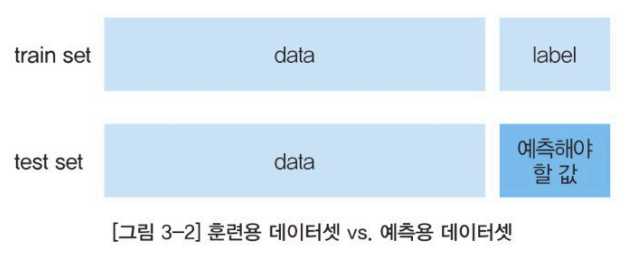

* 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 됨
* 과소적합: 모델이 충분히 학습되지 않은 경우
* 과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
  * 이 상태에서는 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커짐

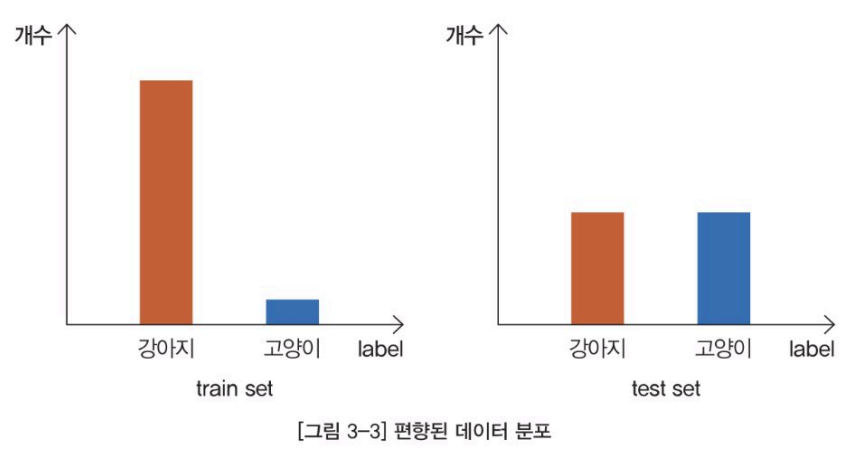

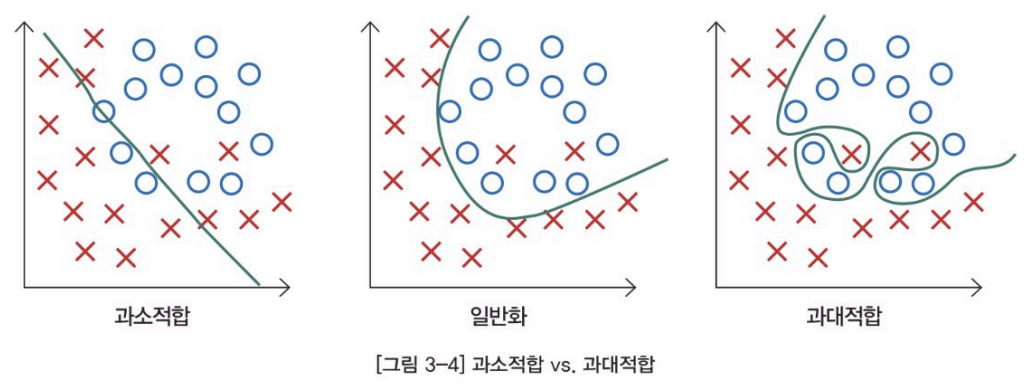

* 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 함

**1-1-3 에포크(epoch)**

* 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
* 1 epoch(에포크): 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
* 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 epoch의 훈련 과정을 마치고 다음 epoch로 넘어감. 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료함


**1-1-4 손실함수(loss function)**

* 손실함수: 예측 값과 정답 값의 차이 또는 오차(Error)
  * 오차: 딥러닝 모델의 출력 값과 실제 값과의 차이
* 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 함
  * 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적
* 지도 학습(supervised learning)의 분류 문제는 이진 분류(binary classification)와 다중 분류(multi-class classification)로 구분 가능
  * 이진 분류 문제를 해결하기 위해서는 'binary_crossentropy' 손실함수를 사용하며, 출력층의 활성화 함수(activation function)가 'sigmoid'인 경우를 말함
  * 다중 분류 문제에는 'categorical_crossentropy' 손실함수를 사용하며, 다중 분류의 대상이 되는 클래스가 원핫 벡터(one-hot vector)인 경우 사용
  * 정답 클래스가 원핫 인코딩이 아닌 레이블 값(ex. 0, 1, 2, 3, ...)으로 표현되어 서로 다른 숫자로 구분되어 있으면 'sparse_categorical_crossentropy' 손실함수를 사용
  * 다중 분류 문제에서는 출력층의 활성함수로 'softmax'를 사용
* 회귀 모델의 경우 평균제곱 오차(Mean Squared Error), 평균절댓값오차(Mean Absolute Error), 후버(Huber) 등이 사용됨
* 텐서플로는 사전 정의된 손실함수를 함수형(Functional API)과 클래스형(Subclassing)으로 제공하고 있음


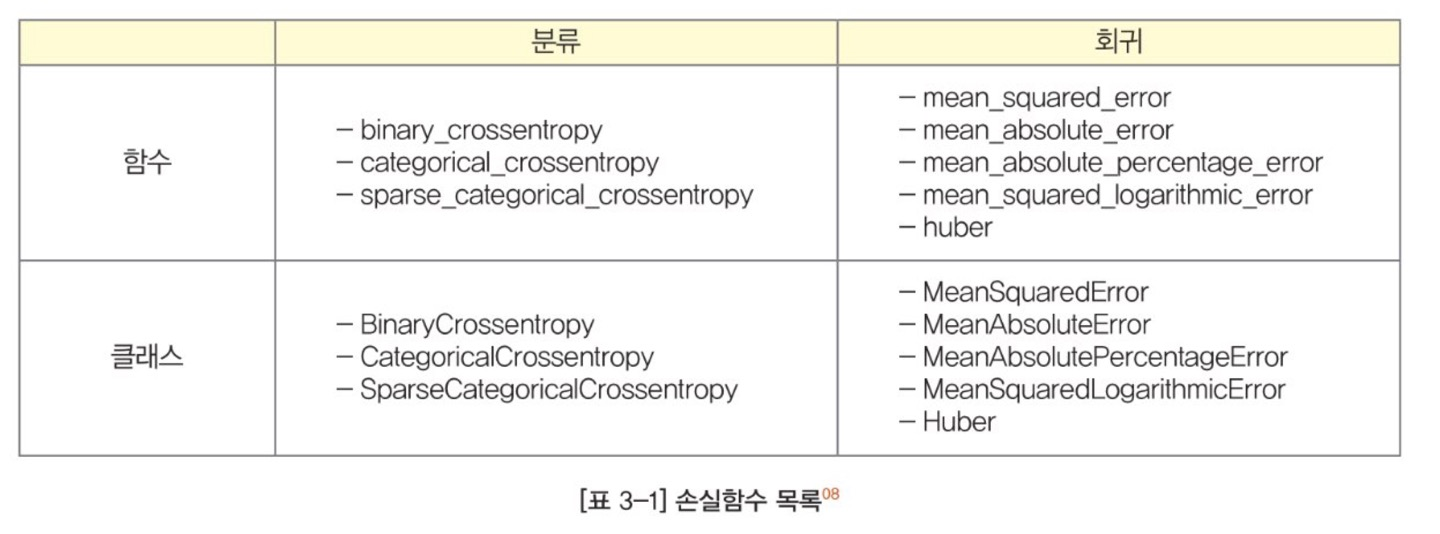

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

**1-1-5 경사하강법(gradient descent**

* 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

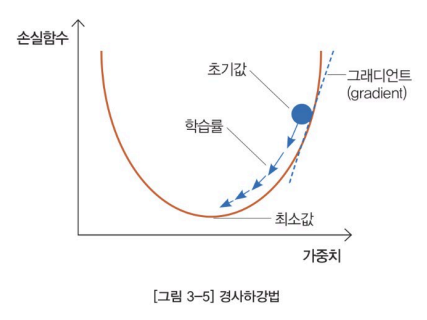

* 딥러닝 훈현 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음
* 손실함수(Loss Function) 혹은 목적 함수 정의
$$
\text{Loss} = \frac{1}{2} Σ(y - \hat y)^{2}
$$
  * $\frac{1}{2}$은 가중치에 대한 그래디언트(gradient)를 계산하기 쉽도록 추가된 상수 값

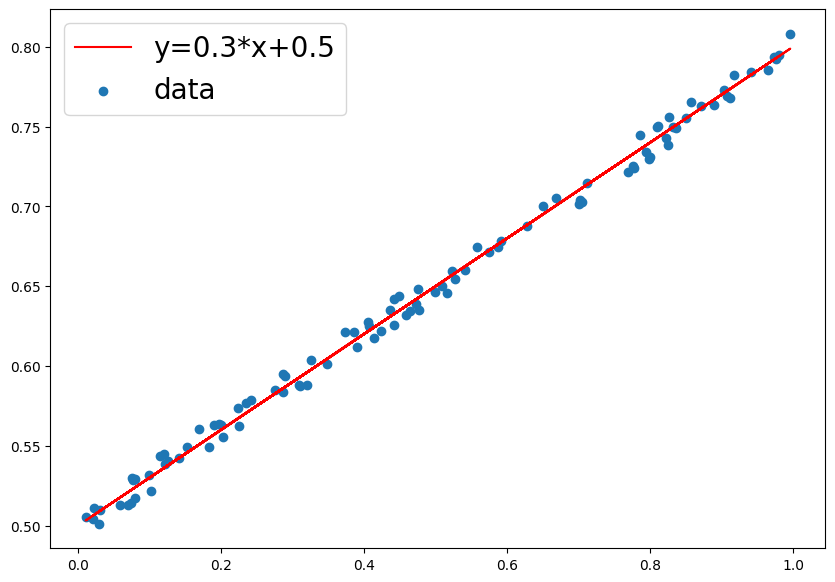

w: 0.3, b: 0.5


In [ ]:
# y = wx + b 단순 선형회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정

import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10, 7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

→ 실제 생성된 y 데이터는 y = 0.3x + 0.5 식과 완벽히 일치하지 않고 약간의 노이즈가 추가됨

* 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감함
  * 가설함수를 $\hat y = wx + b$로 정의
  * 손실함수는 $\frac{1}{2} Σ(y - \hat y)^{2}$로 정의
  * 𝞪는 학습률(learning rate)을 의미

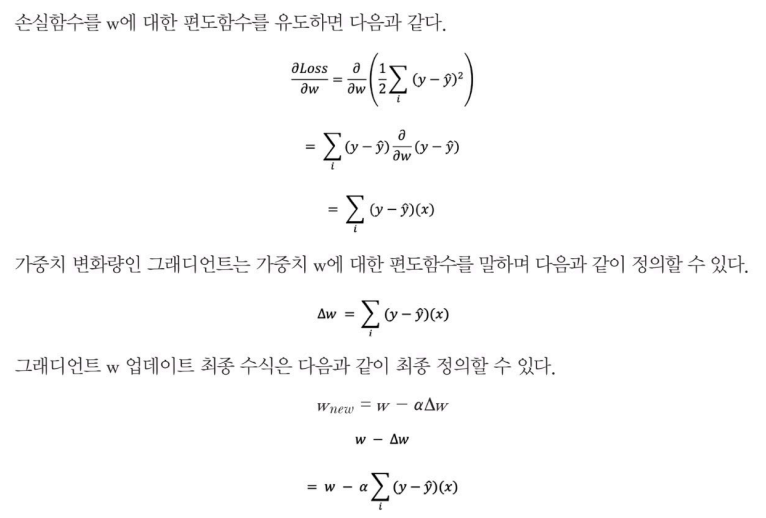

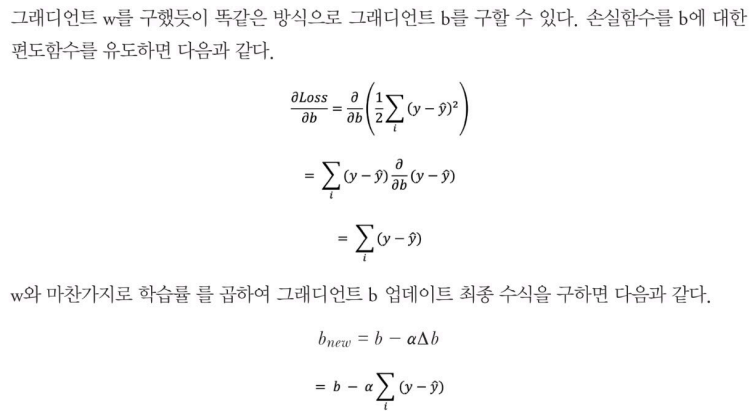

In [ ]:
# 최대 반복 횟수 지정하고 오차가 0.005 이내로 수렴하면 반복문 종료
# 반복문 안에서 손실함수를 정의하고, 매 epoch마다 w, b에 대한 가중치를 업데이트

# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2}w={1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))

print('----'*15)
print('{0:2}w={1:.1f}, b={2:.1f} error={3:.5f}'.format(epoch, w, b, error))

 0w=0.90543, b=0.14298 error=2.62957
 5w=0.81955, b=0.23242 error=1.32638
10w=0.73278, b=0.27738 error=0.92169
15w=0.66035, b=0.31463 error=0.64066
20w=0.59999, b=0.34567 error=0.44547
25w=0.54969, b=0.37153 error=0.30991
30w=0.50777, b=0.39309 error=0.21577
35w=0.47283, b=0.41106 error=0.15038
40w=0.44371, b=0.42603 error=0.10497
45w=0.41945, b=0.43850 error=0.07343
50w=0.39923, b=0.44890 error=0.05152
55w=0.38237, b=0.45757 error=0.03631
60w=0.36833, b=0.46479 error=0.02574
65w=0.35663, b=0.47081 error=0.01840
70w=0.34687, b=0.47582 error=0.01331
75w=0.33874, b=0.48000 error=0.00977
80w=0.33197, b=0.48349 error=0.00731
85w=0.32632, b=0.48639 error=0.00560
------------------------------------------------------------
88w=0.3, b=0.5 error=0.00484


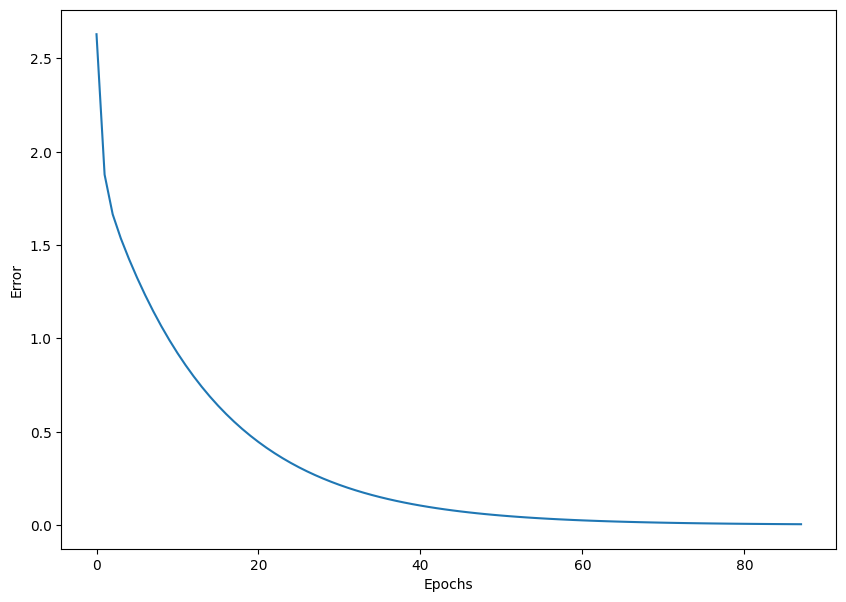

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

→ 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있음

→ 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 되고, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임을 확인할 수 있음

####**1-2 딥러닝 프로세스**



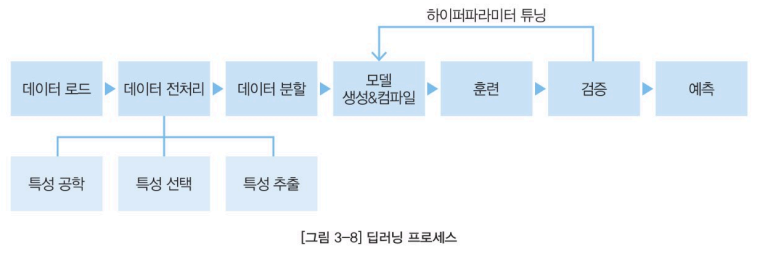

* 데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을 위한 필수 프로세스로 누락되는 단계는 없음
* 예측(predict): 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정
* 검증(evaluate): 모델의 성능을 평가하는 단계

**1-2-1 데이터 전처리**

* 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
* 데이터셋의 종류와 적용하려는 문제 유형에 따라 전처리 방법 다양

**1-2-2 모델 생성**

* 모델의 구조를 정의하고 생성하는 단계
* 모델을 생성하는 방법은 크게 세 가지로 구분할 수 있으며, 순차적인 구조의 모델은 Sequential API로 구현함. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현 가능

**1-2-3 모델 컴파일**

* 딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의함
* 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정함

**1-2-4 모델 훈련**

* 모델을 훈련하는 단계
* fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
* 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정함

**1-2-5 모델 검증**

* 훈련이 완료된 모델을 검증하는 단계
* 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표를 계산
* 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄짐
* 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 계속 반복함

**1-2-6 모델 예측**

* 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환함

###**02 단순 신경망 훈련**

####**2-1 선형회귀**

* 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
* 단순선형회귀(simple linear regression) 모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음
$$y = wx + b$$
  * w는 가중치(weight)의 w이고, b는 편향(bias)의 b를 나타냄

####**2-2 뉴런(Neuron)**

* 뉴런: 인공 신경망 모델을 구성하는 하나의 신경
* 뉴런은 노드(node)라고도 불리우고 같은 의미를 가지며 혼용하여 사용함
* 신경망은 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
* 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨


####**2-3 Dense 레이어**

* Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
* 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층(Fully Connected Layer)이라고 부르기도 함
* Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있음
* 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현 가능
  * 노드의 개수를 Dense 레이어의 첫 번째 위치 인자로 지정
  * Dense 레이어의 activation 매개변수에 활성화 함수를 지정하여 적용

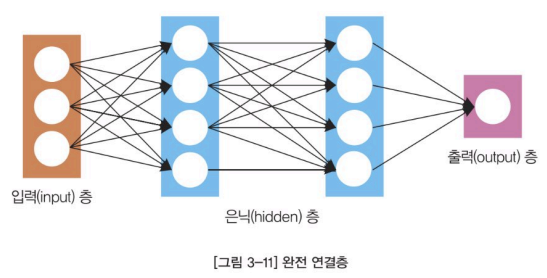

→ 4개의 Dense 레이어로 구성된 모델

→ 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성

→ 각 레이어는 1개 이상의 뉴런으로 구성됨

→ 입력 레이어는 3개의 뉴런이 있고, 출력 레이어는 1개의 뉴런을 가짐

→ 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어서 완전연결층이라고 정의함

In [ ]:
import tensorflow as tf

# 10개의 노트로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

####**2-4 데이터셋 만들기**

* 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해서 x, y 데이터 생성

In [ ]:
# 넘파이 arange() 메소드 활용해 5개의 순차적인 x 데이터 생성, 임의의 1차 함수인 y=3x+2 관계식에 대입하여 y 데이터 5개 생성

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


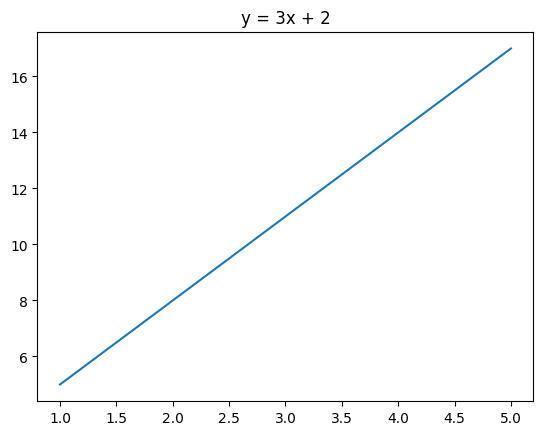

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

####**2-5 Sequential API**

* 텐서플로 케라스는 세 가지 방식으로 모델 생성 가능
* 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있음
* Sequential API 방식: 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
  * 입력 레이어부터 출력 레이어까지 순서를 가짐
* 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행함
* 직관적으로 구조를 이해할 수 있기 때문에, 케라스 모델을 생성하고 훈련하는 가장 간단한 방법이라고 할 수 있지만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조는 만들 수 없음

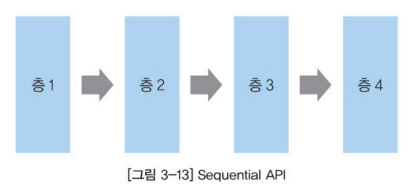

**2-5-1 모델 구조**

* Sequential API를 사용하여 모델 생성 시 두 가지 방법으로 모델 구성 가능
  * 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력(대괄호 안에 쉼표로 구분하여 층을 쌓음)
  * add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식

In [ ]:
import tensorflow as tf

# 리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2-5-2 입력 데이터 형태**

* Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함
* input_shape 매개변수는 주입할 데이터셋의 shape을 튜플 혹은 리스트로 지정할 수 있음


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

**2-5-3 단순선형회귀 모델 정의**

* 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용함
* 여기에 정의한 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
* 1차 함수식 $y = wx + b$에서 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape = [1]로 지정
* 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 y에 대한 모델의 예측 값

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

####**2-6 모델 요약**

* Sequential API로 모델을 만들었다면 model.summary()로 모델의 요약을 확인할 수 있음
* 모델의 요약 내용은 노트북 셀에서 출력 값으로 확인 가능
* 모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표기됨
* 요약의 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기됨

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


→ Total params는 모델 내부에 존재하는 모든 파라미터의 합계가 표기됨

→ Trainable params는 모델 훈련 시 업데이트할 파라미터의 총 개수를 나타냄

→ Non-trainable params는 훈련 시 업데이트하지 않을 파라미터의 총 개수를 나타냄

→ 단순선형회귀 모델에서는 업데이트 파라미터가 가중치 w와 편향 b 두 개. 따라서 요약에서도 총 파라미터의 개수가 2개로 표기됨

####**2-7 컴파일**

* 컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 그리고 평가지표(metrics) 등을 정의함
* 옵티마이저, 손실함수, 평가지표는 3가지 방법으로 지정할 수 있음
  * 클래스 인스턴스, 함수 혹은 사전 정의된 문자열
* 클래스 인스턴스로 지정할 경우 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 하이퍼파라미터 수정은 어렵다는 한계가 있음

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

→ 앞에서 정의한단순선형회귀 모델을 훈련시키기 위해서 옵티마이저는 확률적 경사하강법(Stochastic Gradient Descent) 알고리즘인 'sgd', 손실함수로는 평균제곱오차인 'mse', 그리고 평가지표는 평균절대오차인 'mae'를 지정

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

####**2-8 훈련**

* 생성한 모델 인스턴스에 fit() 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있음
* 모델을 훈련한다는 의미는 가중치(weight) 텐서를 업데이트하는 과정을 말함
* fit() 메소드에는 훈련용 데이터셋의 입력(x)과 정답에 해당하는 출력(y), 그리고 반복 훈련할 epoch 수를 지정함
* 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력함
* verbose=0 옵션을 지정하면, 이와 같은 훈련 중간 과정을 출력하지 않음
* fit() 메소드에 검증 데이터셋(validation_data) 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력함

In [ ]:
# epoch를 5로 설정하여 5회 반복 훈련한 뒤 결과 확인
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 354ms/step - loss: 65.1669 - mae: 7.6247
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 38.1173 - mae: 5.8748
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 22.3532 - mae: 4.5387
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.1658 - mae: 3.5186
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.8108 - mae: 2.7397


→ 5 epoch의 훈련이 끝난 뒤 손실함수(loss)는 7.8108, 평균절대오차(mae)는 2.7397

→ 컴파일 단계에서 손실함수로 평균제곱오차(mse)를 지정했기 떄문에 7.8108는 평균제곱오차를 나타냄

→ 매 epoch당 loss 값을 보면 손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있음

→ 모델이 잘 학습되고 있는 것을 알 수 있지만 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있음(즉 모델은 현재 과소적합 상태라고 볼 수 있음)

In [ ]:
# epoch에 1200 지정하여 충분히 훈련

# 단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 431ms/step - loss: 142.5687 - mae: 11.1364
Epoch 2/1200
1/1 [==============================] - 0s 18ms/step - loss: 83.1682 - mae: 8.5437
Epoch 3/1200
1/1 [==============================] - 0s 17ms/step - loss: 48.5519 - mae: 6.5643
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 28.3787 - mae: 5.0531
Epoch 5/1200
1/1 [==============================] - 0s 15ms/step - loss: 16.6222 - mae: 3.8994
Epoch 6/1200
1/1 [==============================] - 0s 14ms/step - loss: 9.7705 - mae: 3.0185
Epoch 7/1200
1/1 [==============================] - 0s 12ms/step - loss: 5.7771 - mae: 2.3459
Epoch 8/1200
1/1 [==============================] - 0s 13ms/step - loss: 3.4494 - mae: 1.8323
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.0923 - mae: 1.4401
Epoch 10/1200
1/1 [==============================] - 0s 13ms/step - loss: 1.3009 - mae: 1.1406
Epoch 11/1200
1/1 [==============================] 

→ 충분한 epoch 동안 훈련한 후 mse, mae 모두 개선됨

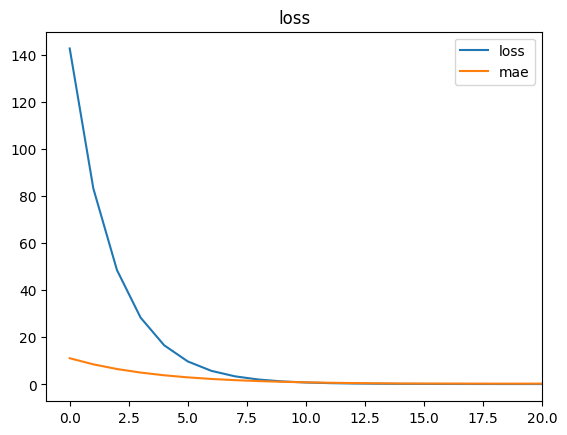

In [ ]:
# 훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('loss')
plt.legend()
plt.show()

→ 첫 10 epoch까지 손실이 급격히 감소

→ 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보임

####**2-9 검증**

* 모델 인스턴스의 evaluate() 메소드로 모델의 성능 검증할 수 있음
* 일반적으로 검증 데이터셋을 입력하여 검증함

In [ ]:
# 별도의 검증 셋 만들어 두지 않았으므로 훈련 데이터셋의 x, y를 대입하여 반환되는 결과 확인
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 325ms/step - loss: 6.1973e-05 - mae: 0.0068


[6.197313632583246e-05, 0.006756973452866077]

→ 두 개의 지표 loss: 6.1973e-05 - mae: 0.0068이 출력되며 모델의 검증 결과를 보여줌

→ 검증 단계에서는 모델 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문에 모델 훈련 단계에서 1200번 epoch를 종료한 상태에서 출력된 값과 같음

####**2-10 예측**

* 훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값 얻을 수 있음

In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 183ms/step


array([[32.032654]], dtype=float32)

→ 모델이 예측 결과로 출력하는 값은 32.032654

→ 데이터셋 생성 시 정의한 1차식이 y = 3x + 2였고, x = 10일 때 y = 32임을 감안한다면 정답에 꽤 근사한 값을 예측함

###**03 심층 신경망으로 이미지 분류**

심층 신경망으로 이미지 분류 모델 생성

이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델 생성

####**3-1 케라스 내장 데이터셋 로드**

* 케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공함
* 데이터셋은 tensorflow.keras.datasets 서브패키지에 위치함
* 데이터셋 지원 목록
  * boston_housing: 보스톤 주택 가격 데이터셋(회귀)
  * cifar10: CIFAR10 이미지 분류 데이터셋(분류)
  * cifar100: CIFAR100 이미지 분류 데이터셋(분류)
  * mnist: mnist 손글씨 데이터셋(분류)
  * fashion_mnist: 의류 데이터셋(분류)
  * imdb: IMDb 영화 데이터셋(분류)
  * reuters: Reuters 뉴스 토픽(분류)
* 케라스의 datasets 패키지에 있는 데이터를 불러오기 위해 load_data() 메소드 사용
  * 이 함수는 훈련 데이터셋과 검증 데이터셋을 구분하여 제공함


In [ ]:
import tensorflow as tf

# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 로드된 데이터셋 확인
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


→ 훈련 셋에는 60000개의 데이터가, 검증 셋에는 10000개의 데이터가 저장되어 있음

→ shape의 첫 번째는 데이터셋의 크기, 나머지는 순서대로 이미지의 세로, 가로의 픽셀 크기

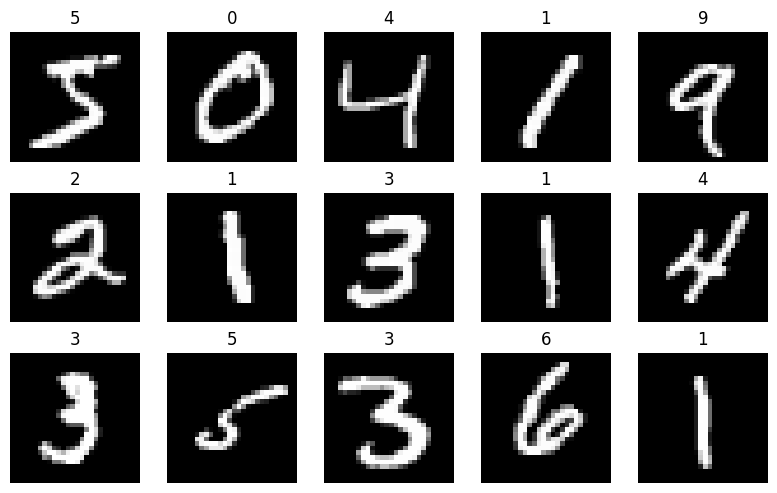

In [ ]:
# 훈련 셋에서 처음 15장에 대한 이미지 시각화
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

* mnist 데이터셋은 사람의 필기체로 쓰인 0~9까지의 숫자들로 이루어진 데이터셋. 총 10개의 정답 레이블로 구성

####**3-2 데이터 전처리**

* 정규화를 통해 데이터의 범위 조절
  * 정규화는 데이터의 전체 범위를 0~1 사이의 값을 가지도록 함
  * 정규화하는 이유는 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]  # 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

→ 0~255 범위의 값으로 이루어짐

→ 데이터의 범위를 0~1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최댓값인 255로 나눔

In [ ]:
# 픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최댓값 확인
print(f'정규화 후] 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

정규화 전] 최솟값: 0, 최댓값: 255
정규화 후] 최솟값: 0.0, 최댓값: 1.0


In [ ]:
# test set에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

####**3-3 Flatten 레이어**

* 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨
* 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음(Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 함)
  * 샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력으로 볼 수 있음

In [ ]:
# 이미지 데이터를 1차원으로 전처리
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
# Flatten 레이어 사용하여 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')  # 784 = 28*28

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


####**3-4 활성화 함수**

* 활성화 함수(Activation Function): 입력을 비선형 출력으로 변환해주는 함수
* 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함
* 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨
* 자주 사용되는 활성화 함수
  * 시그모이드(Sigmoid)
  * 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh)
  * ReLU(Rectified Unit)
  * Leaky ReLU
* 텐서플로 케라스 레이어에 활성화 함수 적용하려면 activation 매개변수에 문자열 대입

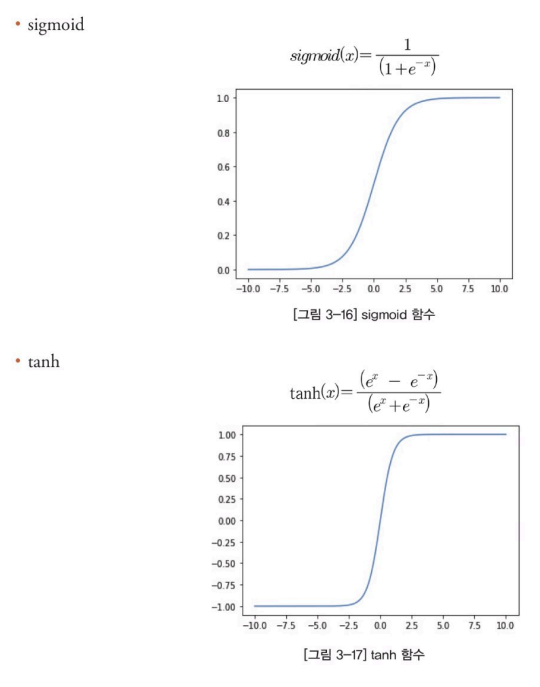

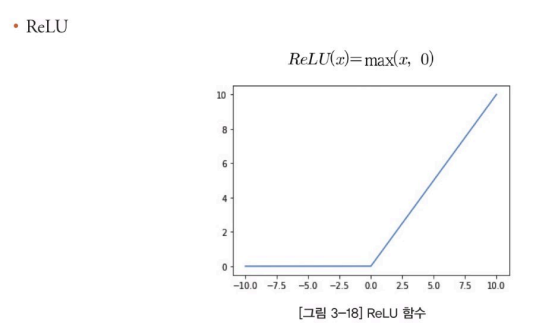

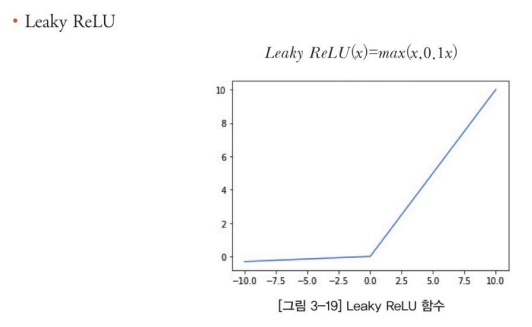

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

→ 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화(Batch Normalization)를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨

→ 즉 레이어 구성을 조금 더 커스터마이징하고 싶을 때 구분하여 처리함

####**3-5 입력과 출력**

* 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적
  * 앞에서 x_train의 shape은 (60000, 28, 28) 배열. 여기서 데이터셋의 크기를 나타내는 60000을 제외하고 이미지의 세로, 가로 형태를 나타내는 input_shape=(28, 28)를 input_shape로 지정
* 분류 모델의 가장 마지막 레이어는 출력층
* 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함
  * mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

→ 모델의 깊이(레이어의 개수)와 너비(각 레이어를 구성하는 노드의 개수)에 대한 정답은 없음. 여러 가지 시도를 통해서 최적의 모델 형태를 찾아야 함

→ 출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용(즉 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 함)

→ 반면 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용(단 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수 사용)

In [ ]:
# 출력층 노드 = 1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

####**3-6 손실함수**

* 분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있음

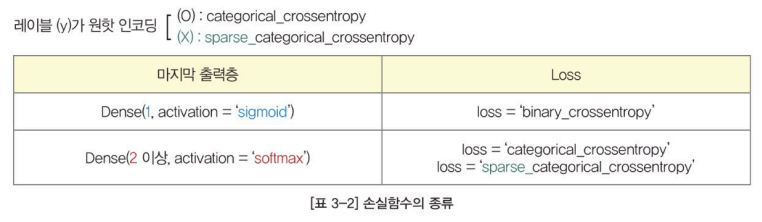

* 이진 분류기(binary classifier) 생성 시 출력층의 노드 개수가 1이면 activation = 'sigmoid'를 지정하며 손실함수는 'binary_crossentropy'를 지정하면 됨

In [ ]:
# 이진 분류 (출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

* 출력층의 노드 개수가 2개 이상일 경우 activation = 'softmax'와 같이 softmax 활성화 함수를 지정하고, 손실함수는 'categorical_crossentropy' 혹은 'sparse_categorical_crossentropy'를 지정
* 출력 데이터(y)가 원핫 벡터(one-hot vector)인 경우에는 'categorical_crossentropy'를 지정하고, 원핫 벡터가 아닌 경우에는 'sparse_categorical_crossentropy'를 지정함

In [ ]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 1., 0.,]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우 -> mnist의 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

mnist 손글씨 데이터셋은 클래스의 개수가 10개이므로 마지막 출력층에 해당하는 Dense 레이어의 노드 개수를 10으로 지정

출력 데이터가 원핫 벡터가 아니고, 0~9까지 레이블 값을 갖기 때문에 손실함수로 'sparse_categorical_crossentropy'를 지정

####**3-7 옵티마이저**

* 옵티마이저(optimizer): 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
* 일반적으로 많이 사용되는 알고리즘은 Adam
* 케라스에서 지원하는 옵티마이저 목록
  * SGD
  * Adam
  * Adagrad
  * Nadam
  * RMSprop
  * Adadelta
  * Adamax
  * Ftrl
* 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정 가능
  * 문자열로 지정할 때는 클래스 이름을 소문자로 표기하면 됨
  * 클래스 인스턴스로 지정할 때는 문자열로 지정할 때와 다르게, 학습률과 같은 하이퍼파라미터를 직접 설정할 수 있음

In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer=['adam'])

####**3-8 평가지표**

* 분류 모델에 대한 평가지표(metrics)는 정확도를 나타내는 'accuracy'(또는 'acc')가 가장 많이 사용되며 'auc', 'precision', 'recall' 등의 지표도 많이 사용됨
* 모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있음
* 평가지표도 옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정 가능

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

####**3-9 훈련**

* 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가지표 나란히 출력

In [ ]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2218 - accuracy: 0.9337 - val_loss: 0.1005 - val_accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0941 - accuracy: 0.9712 - val_loss: 0.0843 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0648 - accuracy: 0.9795 - val_loss: 0.0686 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0494 - accuracy: 0.9838 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0719 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0820 - val_a

####**3-10 평가**

* evaluate() 메소드로 모델 성능을 검증하고 평가 결과 확인 가능

In [ ]:
# 검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9812
검증 셋 정확도: 0.9811999797821045


→ evaluate() 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환

####**3-11 예측**

* predict() 메소드에 데이터 넣어주면 모델의 예측 결과 반환

In [ ]:
# 예측
# 예측에 필요한 새로운 데이터셋 준비되어 있지 않으므로 검증 데이터셋의 입력 데이터인 x_test 사용
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


→ predictions 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장

In [ ]:
# 예측 결과 출력
predictions[0]

array([5.2491801e-14, 6.2164055e-08, 1.2022217e-08, 4.7053734e-09,
       8.7762481e-10, 5.5592628e-11, 9.4963159e-15, 9.9999982e-01,
       3.6563877e-12, 6.3311316e-09], dtype=float32)

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


→ 넘파이 배열의 argmax 활용하여 가장 높은 확률값을 가지는 클래스 결과 확인 가능

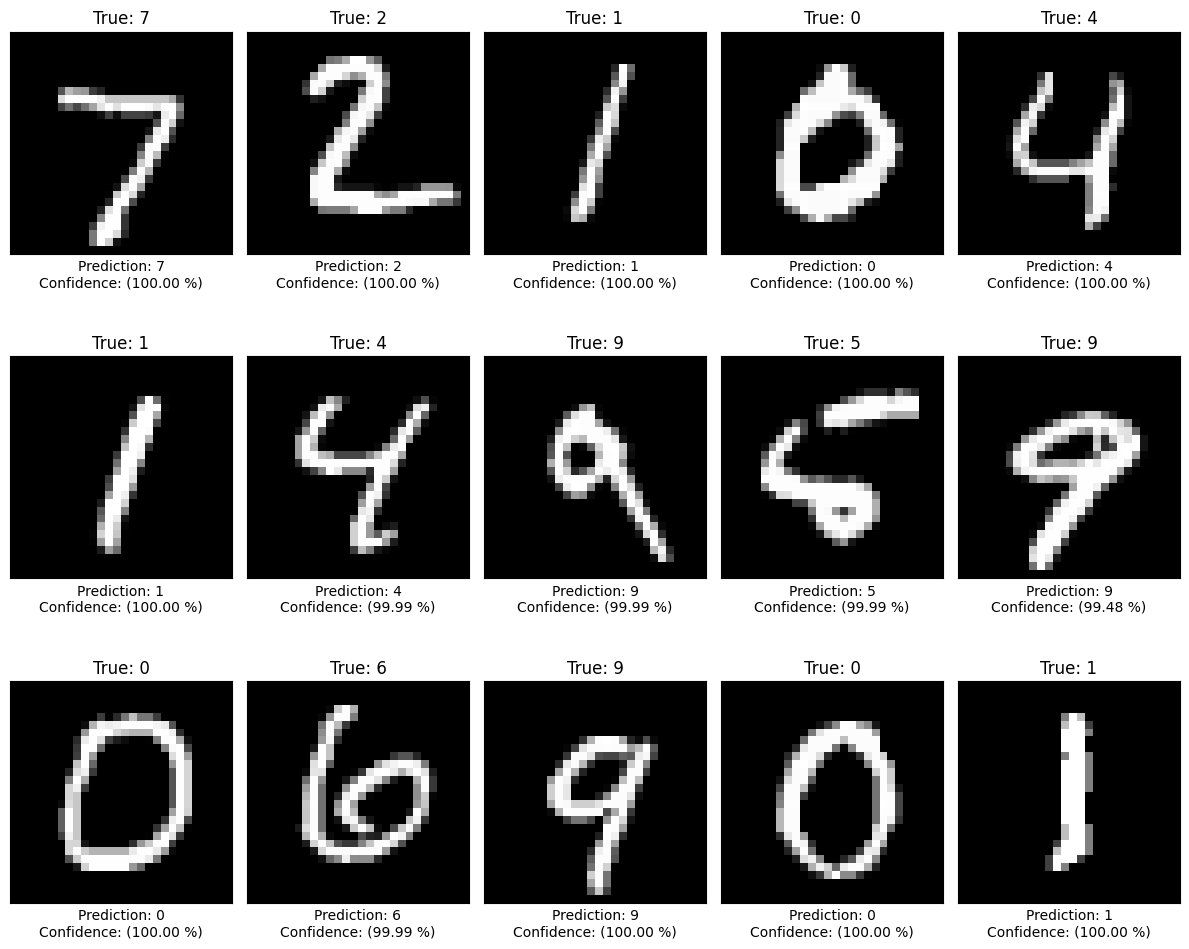

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  # imshow로 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()